# Exploratory Data Analysis


# 1. EDA on Train Data set



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sort_dataframeby_monthorweek import *


print('imported library')

imported library


In [2]:
# Installing packages used to sort data by month and week_days

# !pip install sort-dataframeby-monthorweek
# !pip install sorted-months-weekdays


In [3]:
# reading dataset

url = '..\favorita-grocery-sales-forecasting'

train = pd.read_csv(os.path.join(url, "train.csv") , nrows=1000000 , parse_dates = ['date'] , index_col = 'id')

# train = pd.read_csv(os.path.join(url, "train.csv") ,skiprows=120000000 , nrows=1000000 , parse_dates = ['date'] , index_col = 'id')


In [4]:
train.dtypes

date           datetime64[ns]
store_nbr               int64
item_nbr                int64
unit_sales            float64
onpromotion           float64
dtype: object

In [5]:

print('no rows : {}  ---- no features : {}'.format( *train.shape) )


no rows : 1000000  ---- no features : 5


In [6]:
train.shape[0]  # 1000000  
train.shape[1]  # 6

5

In [7]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
0,2013-01-01,25,103665,7.0,NaN
1,2013-01-01,25,105574,1.0,NaN
2,2013-01-01,25,105575,2.0,NaN
3,2013-01-01,25,108079,1.0,NaN
4,2013-01-01,25,108701,1.0,NaN


In [8]:
train.describe()

,store_nbr,item_nbr,unit_sales,onpromotion
count,1000000.000000,1.000000e+06,1000000.000000,0.0
mean,26.342937,6.175491e+05,8.636756,NaN
std,16.468453,3.034943e+05,19.737254,NaN
min,1.000000,9.699500e+04,-168.000000,NaN
25%,10.000000,3.580960e+05,2.000000,NaN
50%,27.000000,5.871860e+05,4.000000,NaN
75%,41.000000,8.723170e+05,9.000000,NaN
max,54.000000,1.118683e+06,5219.785000,NaN


In [9]:
train.corr()

,store_nbr,item_nbr,unit_sales,onpromotion
store_nbr,1.000000,0.008173,0.053914,NaN
item_nbr,0.008173,1.000000,-0.009816,NaN
unit_sales,0.053914,-0.009816,1.000000,NaN
onpromotion,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F02F31BC18>,
      dtype=object)

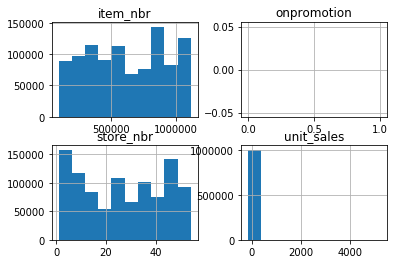

In [10]:
train.hist()

# plt.hist(train.unit_sales , bins=20)
# plt.ylim(0,100)

# Checking Missing values :
Checking if any column in train data frame has Nan values.

In [11]:
train.isnull().values.any()

True

In [12]:
train.isnull().any()

date           False
store_nbr      False
item_nbr       False
unit_sales     False
onpromotion     True
dtype: bool

In [13]:
def find_null_values (df) :
    if df.isnull().values.any():
        null_col = df.columns[train.isnull().any()].tolist()   # ['onpromotion']
        for col in null_col :
            total_values = df.shape[0]
            null_vales = df[col].isnull().sum()
            print('{} == >  no. nan values is  {}'.format(col , null_vales))
            print('{:.2f}'.format( (100*null_vales) / total_values ))
            print('\n')
    else:       
        print("no column has Nan values")

In [14]:
find_null_values(train)

onpromotion == >  no. nan values is  1000000
100.00




# Replacing Nan values with -1 in onpromotion column

In [15]:
train['onpromotion'].dtypes   # dtype('float64')

# train['onpromotion']= train['onpromotion'].astype(float)

dtype('float64')

In [16]:
# Missing values filled with -1
train['onpromotion'] = train['onpromotion'].fillna( np.int(-1) )

# Unit sales of Each Store

In [17]:
# Group By store_nbr and Sum of unit_sales for each store_nbr

# train.groupby(['store_nbr'])["unit_sales"].sum()
data_n = train.groupby(['store_nbr'], as_index = False ).agg({'unit_sales':'sum'}) 

# Total number of stores  == 46


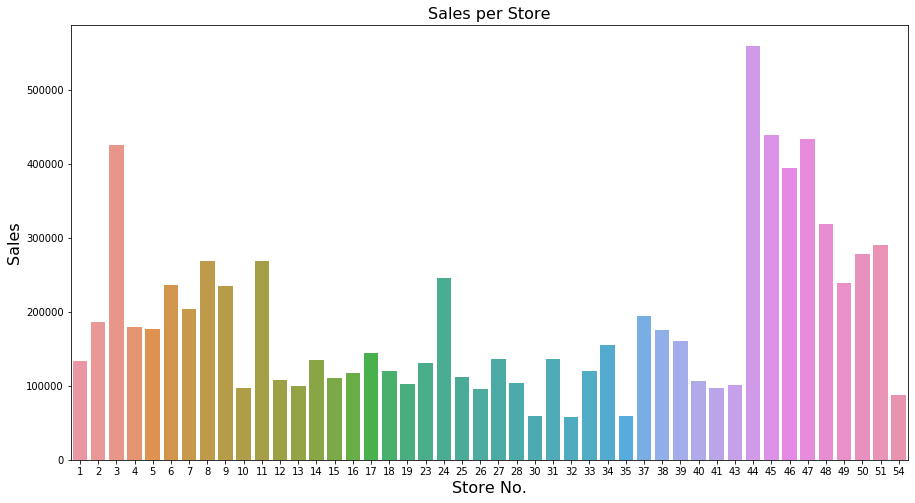

In [18]:
#PLotting store_nbr Vs unit_sales

plt.figure( figsize=(15,8))
# ax = sns.barplot(x = data_n.index , y= "unit_sales", data = data_n)
ax = sns.barplot(x = 'store_nbr' , y= "unit_sales", data = data_n)

plt.title('Sales per Store',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.xlabel('Store No.',fontsize=16)
plt.show()


    There are 54 unique stores.
    Store No. 44 has the maximum sales.
    Store No. 32 has the minimum sales.

# Unit sales of Each Item

In [19]:
# Group By item_nbr and Sum of unit_sales for each item_nbr

x = train.groupby(['item_nbr'], as_index=False).agg({'unit_sales':'sum'}) 
x.head(5)

,item_nbr,unit_sales
0,96995,184.0
1,103501,2851.0
2,103520,2153.0
3,103665,3570.0
4,105574,7021.0


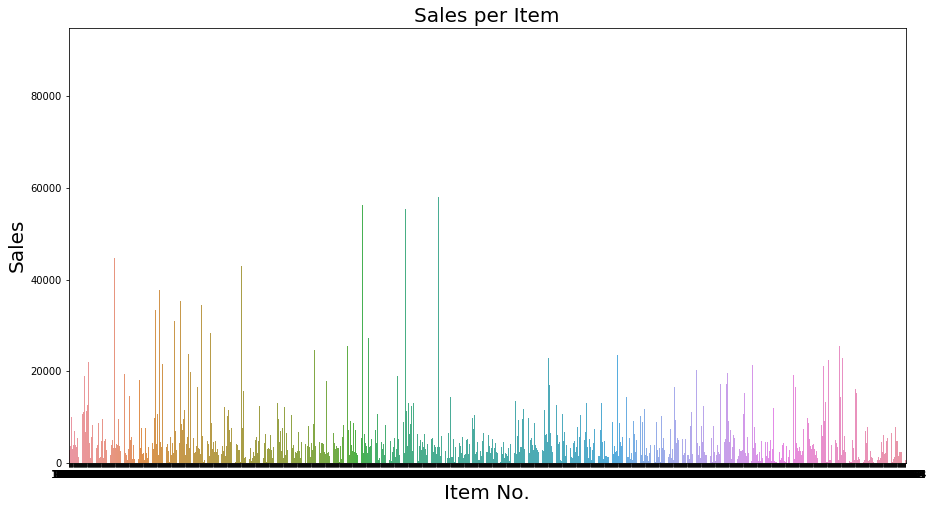

In [20]:
#Plotting item_nbr Vs unit_sales

plt.figure( figsize=(15,8))
ax = sns.barplot(x = x.item_nbr, y = x.unit_sales , data = x)

plt.title('Sales per Item',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Item No.',fontsize=20)
plt.show()



فقط در چند مورد فروش بالایی داریم 
اما تنوع فروش در کالاهای مختلف هست

# Sales per Year :

In [21]:
# train.store_nbr.unique()
# train.date.unique()

In [22]:
train['year']  = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day']   = train['date'].dt.day

# train['year']  = pd.DatetimeIndex(train['date']).year
# train['month'] = pd.DatetimeIndex(train['date']).month
# train['day']   = pd.DatetimeIndex(train['date']).day

train.head(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day
id,,,,,,,,
0,2013-01-01,25,103665,7.0,-1.0,2013,1,1
1,2013-01-01,25,105574,1.0,-1.0,2013,1,1
2,2013-01-01,25,105575,2.0,-1.0,2013,1,1
3,2013-01-01,25,108079,1.0,-1.0,2013,1,1
4,2013-01-01,25,108701,1.0,-1.0,2013,1,1
5,2013-01-01,25,108786,3.0,-1.0,2013,1,1
6,2013-01-01,25,108797,1.0,-1.0,2013,1,1
7,2013-01-01,25,108952,1.0,-1.0,2013,1,1
8,2013-01-01,25,111397,13.0,-1.0,2013,1,1


In [23]:
# فروش هر فروشگاه در هر سال 
data_n = train.groupby(['store_nbr','year'], as_index = False ).agg({'unit_sales':'sum'}) 
data_n.head(5)

,store_nbr,year,unit_sales
0,1,2013,133935.038
1,2,2013,186073.077
2,3,2013,425307.688
3,4,2013,178950.133
4,5,2013,176413.157


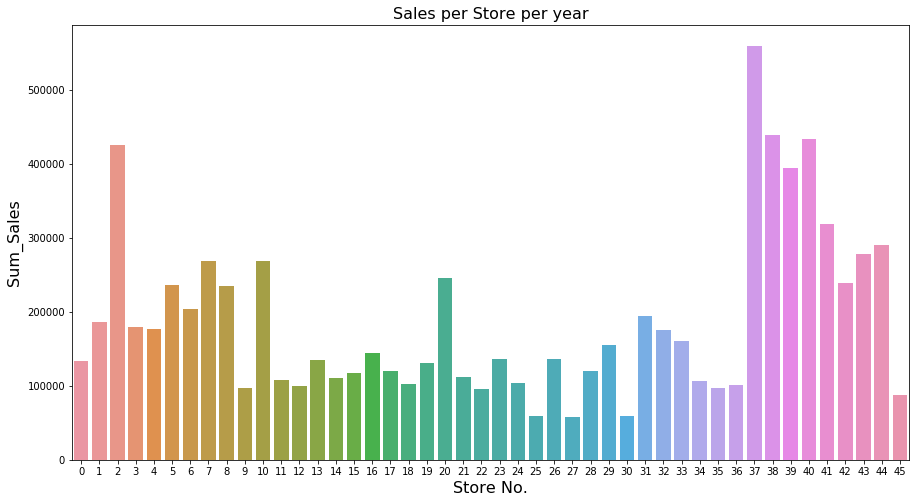

In [24]:
plt.figure( figsize=(15,8))
ax = sns.barplot(x = data_n.index , y= "unit_sales", data = data_n)
plt.title('Sales per Store per year',fontsize=16)
plt.ylabel('Sum_Sales',fontsize=16)
plt.xlabel('Store No.',fontsize=16)
plt.show()

In [25]:
data_n = train.groupby(['year'], as_index = False ).agg({'unit_sales':'sum'}) 
data_n

,year,unit_sales
0,2013,8636756.278


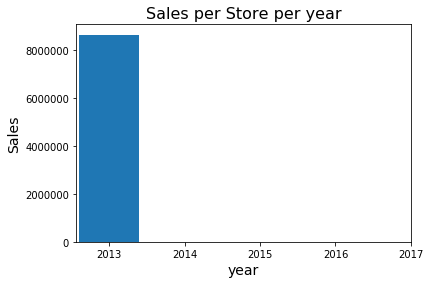

In [26]:
plt.bar(data_n.year , data_n.unit_sales)
plt.title('Sales per Store per year',fontsize=16)

plt.xticks((2013,2014,2015,2016,2017))

plt.ylabel('Sales',fontsize=14)
plt.xlabel('year',fontsize=14)
plt.show()

# del data_n



بررسی افزایش فروش در هر سال ؟؟؟
فروش شامل چه سالهایی هست ؟

In [27]:
# Viewing Data only for 2013
# نمایش دیتاهای یک تاریخ خاص

train[train['date'].dt.year == 2013]
# OR
train[train['year']==2013] . head()


,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day
id,,,,,,,,
0,2013-01-01,25,103665,7.0,-1.0,2013,1,1
1,2013-01-01,25,105574,1.0,-1.0,2013,1,1
2,2013-01-01,25,105575,2.0,-1.0,2013,1,1
3,2013-01-01,25,108079,1.0,-1.0,2013,1,1
4,2013-01-01,25,108701,1.0,-1.0,2013,1,1


# Sales per Month for every year :

In [28]:
# check code

# uniqu_year = train["date"].dt.year.unique()

# train['date'].dt.month_name()

# train.groupby(['month'], as_index=False).agg({'unit_sales':'sum'})

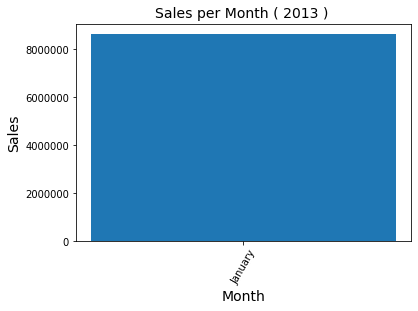

In [29]:
for year in train["date"].dt.year.unique():
    
    #Filtering data for specific year
    # برداشتن دیتاهای مثلا سال 2013
    x = train[train["date"].dt.year == year]

    #Extracting month name from date
    x['month']=x['date'].dt.month_name()

    #Grouping data by months and adding unit_sales
#   x=x.groupby(['month'], as_index=False).agg({'unit_sales':'sum'})
    x=x.groupby(['month'], as_index=False)['unit_sales'].sum()
    
    #Sorting dataframe by Month
    x = Sort_Dataframeby_Month( df=x , monthcolumnname='month')
# ------------------------------------------------------------
    #Plotting month Vs unit_sales for every year
#   plt.figure(figsize=(12,8))
    plt.bar(x.month, x.unit_sales)
    plt.xticks(rotation=60)
#   plt.title("Sales per Month (" + str(year) + ")" ,fontsize=14)
    plt.title("Sales per Month ( {} ) " .format(str(year)) ,fontsize=14)
    plt.ylabel('Sales',fontsize=14)
    plt.xlabel('Month',fontsize=14)
    plt.show()
    
    del x



- Which months had the highest sales and which months the lowest ?
بیشترین فروش در ماه و کمترین فروش در ماه


# Sales per Day of Week in year :

In [30]:
#Filtering data having year = 2013 only
df_2013 = train[train["date"].dt.year==2013]

# Adding Day of Week as a Feature
df_2013['day_of_week'] = df_2013['date'].dt.day_name()
df_2013.head(10)


,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day,day_of_week
id,,,,,,,,,
0,2013-01-01,25,103665,7.0,-1.0,2013,1,1,Tuesday
1,2013-01-01,25,105574,1.0,-1.0,2013,1,1,Tuesday
2,2013-01-01,25,105575,2.0,-1.0,2013,1,1,Tuesday
3,2013-01-01,25,108079,1.0,-1.0,2013,1,1,Tuesday
4,2013-01-01,25,108701,1.0,-1.0,2013,1,1,Tuesday
5,2013-01-01,25,108786,3.0,-1.0,2013,1,1,Tuesday
6,2013-01-01,25,108797,1.0,-1.0,2013,1,1,Tuesday
7,2013-01-01,25,108952,1.0,-1.0,2013,1,1,Tuesday
8,2013-01-01,25,111397,13.0,-1.0,2013,1,1,Tuesday


Text(0, 0.5, 'Sales')

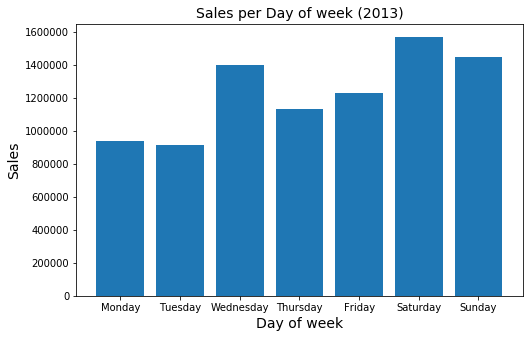

In [31]:
# Group By day_of_week and Sum of unit_sales for each day_of_week

# x = df_2016.groupby(['day_of_week'], as_index=False).agg({'unit_sales':'sum'})
x = df_2013.groupby(['day_of_week'], as_index=False)['unit_sales'].sum()

#Sorting Dataframe by Week_day
x = Sort_Dataframeby_Weekday( df = x , Weekdaycolumnname = 'day_of_week' )

#Plotting day_of_week Vs unit_sales
plt.figure(figsize=(8,5))
plt.bar(x.day_of_week, x.unit_sales)
plt.title('Sales per Day of week (2013)', fontsize= 14)
plt.xlabel('Day of week', fontsize= 14)
plt.ylabel('Sales', fontsize= 14)


#  
    - Saturday has the maximum sales followed by Sunday 
        (i.e. Weekends seem to be prefered as compared to Weekdays to shop at this supermaket.)
        
    - ***** has the least sales.


# No. of Items on promotion :

 تعداد محصولات در تبلیغات 

In [32]:
# df_2013.onpromotion.value_counts()
# df_2013.onpromotion.value_counts().values


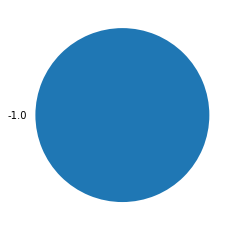

In [33]:
y = df_2013.onpromotion.value_counts().values

plt.pie(y , labels=df_2013.onpromotion.unique())
plt.show()


In [34]:
x = df_2013.groupby(['onpromotion'], as_index=False).size()
x

onpromotion
-1.0    1000000
dtype: int64

# Sales for on promotion/not on promotion Items :

Text(0, 0.5, 'Sales')

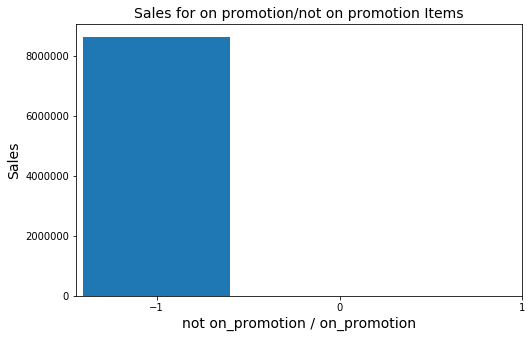

In [35]:
# x = df_2013.groupby(['onpromotion'], as_index=False).agg({'unit_sales':'sum'})
x = df_2013.groupby(['onpromotion'], as_index=False)['unit_sales'].sum()

plt.figure(figsize=(8,5))
plt.bar(x.onpromotion, x.unit_sales)
plt.title('Sales for on promotion/not on promotion Items', fontsize= 14)
plt.xticks((-1 ,0,1))
plt.xlabel('not on_promotion / on_promotion', fontsize= 14)
plt.ylabel('Sales', fontsize= 14)


Sales for Items Not on Promotion are higher (as there are very few items on promotion)